행렬 A 와 B의 고윳값과 고유벡터 출력

In [1]:
import numpy as np

In [2]:
A = np.array([[2,3], [3,-6]])
w1, V1 = np.linalg.eig(A) #linear algebra 패키지 내의 eig(eigen value and vector)를 이용

In [3]:
print("A의 고윳값 : ", w1)
print("A의 고유벡터:", V1)

A의 고윳값 :  [ 3. -7.]
A의 고유벡터: [[ 0.9486833  -0.31622777]
 [ 0.31622777  0.9486833 ]]


3에 대한 고유벡터는 위,
-7에 대한 고유벡터는 아래

In [5]:
B = np.array([[5,2,0], [2,5,0], [-3,4,6]])
w2, V2 = np.linalg.eig(B)

In [6]:
print("A의 고윳값 : ", w2)
print("A의 고유벡터:", V2)

A의 고윳값 :  [6. 7. 3.]
A의 고유벡터: [[ 0.          0.57735027  0.36650833]
 [ 0.          0.57735027 -0.36650833]
 [ 1.          0.57735027  0.85518611]]


2.  
  
  
붓꽃 데이터를 읽고 주성분분석을 적용해 2차원 데이토로 차원축소를 한 결과를 출력

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [9]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal with', 'target'])

In [10]:
n_row, n_col = df.shape

In [12]:
print("Iris dataset:", n_row, "records with ", n_col, "attributes\n")
print("first 5 records in iris data\n", df.head(5))

Iris dataset: 150 records with  5 attributes

first 5 records in iris data
    sepal length  sepal width  petal length  petal with       target
0           5.1          3.5           1.4         0.2  Iris-setosa
1           4.9          3.0           1.4         0.2  Iris-setosa
2           4.7          3.2           1.3         0.2  Iris-setosa
3           4.6          3.1           1.5         0.2  Iris-setosa
4           5.0          3.6           1.4         0.2  Iris-setosa


In [13]:
features = ['sepal length', 'sepal width', 'petal length', 'petal with']
x = df.loc[:, features].values        #데이터의 속성값
y = df.loc[:,['target']].values       #데이터의 부류

In [14]:
x = StandardScaler().fit_transform(x)  #평균 0 , 분산 1 인 데이터로 변환

In [15]:
pca = PCA(n_components=2)              #PCA를 적용하여 2개의 주성분만 추출
principal_components = pca.fit_transform(x)

In [16]:
print("\n first principal axis:",pca.components_[0]) #주성분 축 2개를 이용해 2차원 데이터로 변환 
print("second principal axis:",pca.components_[1])


 first principal axis: [ 0.52237162 -0.26335492  0.58125401  0.56561105]
second principal axis: [0.37231836 0.92555649 0.02109478 0.06541577]


In [20]:
principal_Df = pd.DataFrame(data = principal_components,
                           columns = ['principal component 1', 'principal component 2'])
final_Df = pd.concat([principal_Df, df[['target']]], axis=1)

In [21]:
print("\nFirst 5 Transformed records\n", final_Df.head(5))


First 5 Transformed records
    principal component 1  principal component 2       target
0              -2.264542               0.505704  Iris-setosa
1              -2.086426              -0.655405  Iris-setosa
2              -2.367950              -0.318477  Iris-setosa
3              -2.304197              -0.575368  Iris-setosa
4              -2.388777               0.674767  Iris-setosa


<ipython-input-23-0c7a5fe35d99>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


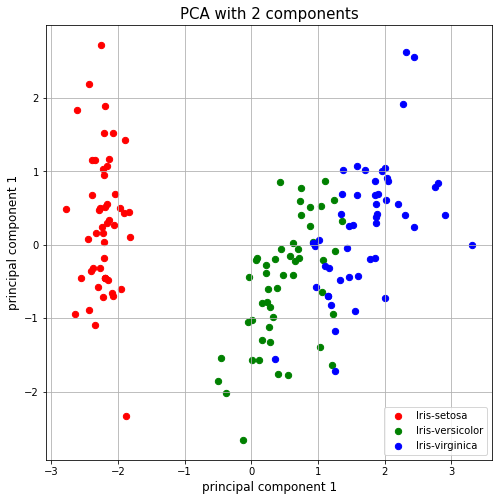

In [23]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('principal component 1', fontsize = 12)
ax.set_ylabel('principal component 1', fontsize = 12)
ax.set_title('PCA with 2 components', fontsize = 15)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices_to_keep = final_Df['target'] == target
    ax.scatter(final_Df.loc[indices_to_keep, 'principal component 1'],
              final_Df.loc[indices_to_keep, 'principal component 2'], c=color, s=40)

ax.legend(targets)
ax.grid()
fig.show()